In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

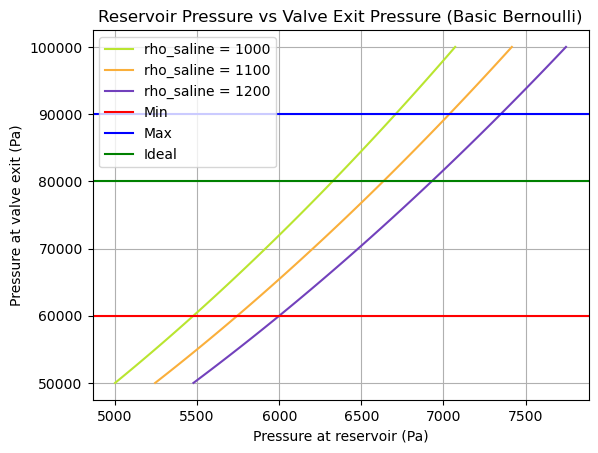

In [18]:
#Velocity at flesh

#Using Bernoulli
# P1 = P2 + 0.5 * rho * v_2^2
# v_2 = sqrt(...)

#Valve pressure at tube exit
p_exit = 80e3 #Pa
p_exit = np.linspace(50e3, 100e3, 100)

#Density of saline
rho_saline = 1000 #kg/m^3
v_flesh = np.sqrt(2*p_exit/rho_saline)


########################################################################################################

#Pressure at reservoir
# P1 = P2 + 0.5 * rho * v_2^2

p_atm = 101325 #atm
p_reservoir = p_atm + 0.5 * rho_saline * v_flesh
p_res_valve = p_reservoir - p_atm

#LIMITS
p_exit_min = 60e3
p_exit_max = 90e3
p_exit_ideal = 80e3

rho_saline_var = [1000,1100,1200]

for rho in rho_saline_var:
    v_flesh_var = np.sqrt(2*p_exit/rho)
    p_reservoir_var = p_atm + 0.5 * rho * v_flesh_var
    p_res_valve_var = p_reservoir_var - p_atm
    plt.plot(p_res_valve_var, p_exit, label = 'rho_saline = '+str(rho), c=np.random.rand(3,))

plt.ylabel('Pressure at valve exit (Pa)')
plt.xlabel('Pressure at reservoir (Pa)')
plt.title('Reservoir Pressure vs Valve Exit Pressure (Basic Bernoulli)')
plt.axhline(y=p_exit_min, color='r', linestyle='-', label='Min')
plt.axhline(y=p_exit_max, color='blue', linestyle='-', label='Max')
plt.axhline(y=p_exit_ideal, color='g', linestyle='-', label='Ideal')
plt.legend()
plt.grid()


Text(0.5, 1.0, 'Force vs Syringe Pullback (Spring). Head area = 0.001963495408493621m^2. Spring constant = 15000.0N/m')

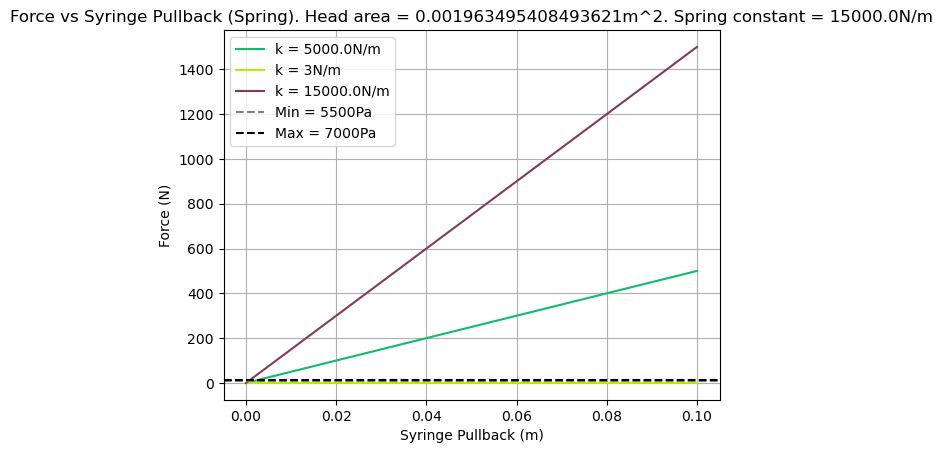

In [33]:
#Pressure needed at syringe exit

p_min = 5500
p_max = 7000


#Spring
k = [5e3,3,15e3] #N/m
x = np.linspace(0, 0.1, 100) #0.1 meter syringe pullback

#Vac pressure
p_vac = 1000 #Pa

#Syringe Details
r = 0.05/2 #m
A = np.pi * r**2 #m^2

#TODO: IS THIS FAIR?
f_min = p_min * A
f_max = p_max * A

F = p_vac * A


#Plot
for k in k:
    F_spring = k * x
    plt.plot(x, F_spring, label='k = '+str(k)+'N/m',c=np.random.rand(3,))
plt.axhline(y=f_min, color='grey', linestyle='--', label='Min = '+str(p_min)+'Pa')
plt.axhline(y=f_max, color='black', linestyle='--', label='Max = '+str(p_max)+'Pa')
plt.xlabel('Syringe Pullback (m)')
plt.ylabel('Force (N)')
plt.legend()
plt.grid()
plt.title('Force vs Syringe Pullback (Spring). Head area = '+str(A)+'m^2. Spring constant = '+str(k)+'N/m')

#Volum



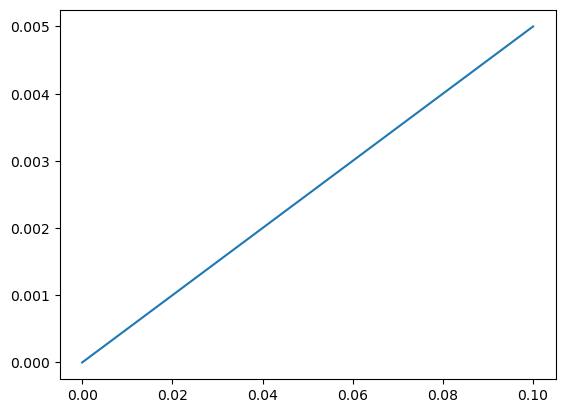

In [30]:
V = 1e-5 #m^3
V_cyl = A * x
plt.plot(x, V_cyl, label='Cylinder Volume')